In [2]:
import pandas as pd
import matplotlib as mtp
import math

In [8]:
agam = pd.read_excel(r"agam-group.xlsx")

In [110]:
# Masks

typeMask = agam['Type'] == "text"
contentMask = agam.Content.str.contains("חירום", na=False)
timeMask = agam.Time == '10:23'

In [32]:
def countWords(word, dataframe):
    contentMask = dataframe.Content.str.contains(word, na=False)
    return len(dataframe[contentMask])

In [20]:
keyWords = ["חירום", "נפילה", "צבע אדום", "טילים", "אזעקה", "טיל", "רקטה", "תקיפה", "הפציץ", "חרדה", "נפגעים", "נפצעו"]

In [34]:
wordsCounts = {}
for word in keyWords:
    wordsCounts[word] = countWords(word, allData)
    

In [35]:
wordsCounts

{'חירום': 63,
 'נפילה': 17,
 'צבע אדום': 24,
 'טילים': 11,
 'אזעקה': 44,
 'טיל': 11,
 'רקטה': 13,
 'תקיפה': 5,
 'הפציץ': 0,
 'חרדה': 29,
 'נפגעים': 37,
 'נפצעו': 6}

In [111]:
for time in list(agam.Time):
    agam[agam.Time == ].Content.str.count("רשות")


,Unnamed: 0,Name,Date,Time,Type,Content,File Url
0,0,+972 52-899-0284,7.11.2019,10:23,text,משרד הביטחון \n\nרשות המעברים תקיים היום תרגיל...,NaN
1,1,+972 52-899-0284,NaN,10:23,DeletedMessage,הודעה זו נמחקה,NaN
2,2,+972 52-899-0284,NaN,10:23,DeletedMessage,הודעה זו נמחקה,NaN


In [131]:
agam[agam.Time == '10:23'].Content.str.count("רשות")

0    1
1    0
2    0
Name: Content, dtype: int64

In [250]:
# Count word in messages over time
overTime = agam.pivot_table(values='Content', columns=["Time"], aggfunc= lambda v : (v.str.count("אזעקה").sum()))

In [251]:
time 
for time in overTime.columns:
    overTimeObj[time] = list(overTime[time])[0]

In [277]:
times = []
counts = []
for time in overTime.columns:
    times.append(time)
    counts.append(list(overTime[time])[0])

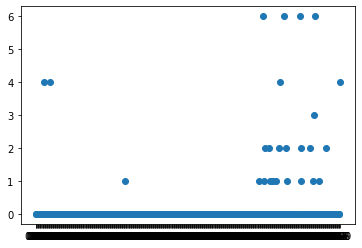

In [279]:
mtp.pyplot.plot_date(times, counts)

In [260]:
a = pd.DataFrame({ "Time": times, "Repeats": counts })
a.to_excel("azaka.xlsx")

In [246]:
# Count word in messages over time
overTime = agam.pivot_table(values='Content', columns=["Time"], aggfunc= "count")

In [253]:
overTime

Time,0:24,0:27,10:00,10:19,10:23,10:25,10:33,10:46,10:47,10:55,...,9:40,9:41,9:44,9:46,9:47,9:51,9:53,9:54,9:56,9:57
Content,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
agam = pd.read_excel(r"agam-group.xlsx")
batash = pd.read_excel(r"batash-group.xlsx")
dobruyot = pd.read_excel(r"dobruyot-group.xlsx")
hamal = pd.read_excel(r"hamal_kabat-group.xlsx")
malah = pd.read_excel(r"malah_jerusalem-group.xlsx")

allData = pd.concat([agam, batash, dobruyot, hamal, malah])

In [292]:
# Count word in messages over time
def saveAnalysis(word):
    overTime = allData.pivot_table(values='Content', columns=["Time"], aggfunc= lambda v : (v.str.count(word).sum()))

    times = []
    counts = []
    
    for time in overTime.columns:
        times.append(time)
        counts.append(list(overTime[time])[0])
        
    mtp.pyplot.plot_date(times, counts)

    a = pd.DataFrame({ "Time": times, "Repeats": counts })
    a.to_excel( word + ".xlsx")

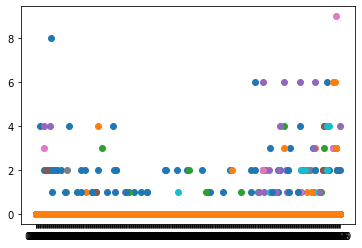

In [293]:
for i in keyWords:
    saveAnalysis(i)

In [30]:
allData[allData.Content.str.contains("נפילה", na=False)]

,Unnamed: 0,Name,Date,Time,Type,Content,File Url
97,97,+972 58-555-8360,12.11.2019,7:03,text,"בוקר טוב,\nעד כה, מלבד נפילה אחת בשטח פתוח, לא...",NaN
112,112,+972 52-899-0284,12.11.2019,7:48,text,הודעה מעיריית שדרות\nנפילה בחצר בית בשדרות. אי...,NaN
125,125,+972 50-220-9626,12.11.2019,8:14,text,תל אביב נפילה בשטח פתוח,NaN
135,135,+972 50-465-5775,12.11.2019,8:56,text,דוברות המשטרה (לכיש):\n\nחבלני משטרת ישראל מטפ...,NaN
154,154,+972 50-465-5775,12.11.2019,9:46,text,דוברות המשטרה (לכיש):\n\nכוחות משטרה הוזעקו אל...,NaN
158,158,+972 50-465-5775,12.11.2019,9:51,text,12.11\n09:50\nנפילה בשטח פתוח של המועצה. בעקבו...,NaN
178,178,+972 50-465-5775,12.11.2019,11:58,text,דוברות שדרות:\nנפילה במפעל באזור התעשייה בשדרו...,NaN
158,158,+972 58-555-8360,12.11.2019,7:03,text,"בוקר טוב,\nעד כה, מלבד נפילה אחת בשטח פתוח, לא...",NaN
162,162,+972 58-555-8360,12.11.2019,7:17,text,הודעה מעיריית שדרות\nנפילה בחצר בית בשדרות. אי...,NaN
200,200,+972 58-555-8360,12.11.2019,9:46,text,דוברות המשטרה (לכיש):\n\nכוחות משטרה הוזעקו אל...,NaN


In [31]:
countWords("נפילה", allData)

c:\users\shai drai\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: cannot reindex from a duplicate axis